# Principles of Data Science Assignment 1

## Phase 1

In this project, we propose the use of machine-learning techniques to predict Telstra network outage severity. 

Should we be successful, the benefits to Telstra will be the ability to provide a better level of support to their customers through higher network availability, quicker time to resolution of network faults and more proactive notification of expected downtime.

Our larger objective relates to the extensibility of this work to a worldwide opportunity that would seem immense -- for service providers, cloud service providers, large enterprise and networking equipment suppliers alike. 

The data preparation in this notebook includes 4 steps outlined below:
1.	Import CSVs into Pandas Dataframes
2.	Assess the data structure and features inherently present in the data
3.	Visualising the data
4.	Prepare the data for classifier training

### Start by importing useful Python libraries.

In [195]:
import pandas as pd
import xgboost as xgb
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

### 1. Import Data from CSV files

Load all files into dataframes.

| File Name | Size |
| ------ | ----------- |
| log_feature.csv  | (31170,2) |
| event_type.csv | (56671,3) |
| resource_type.csv   | (21076,2) |
| severity.csv  | (18552,2) |
| test.csv| (11171,2) |
| train.csv  | (7381,3) |

While loading, take opportunity to prepare the data for use in training the classifier:
1. Strip strings from categories to allow for conversion to numeric (since XGBoost deals with numerics)
2. Convert categorical variables into numeric
3. Retain csv column headings for use in the dataframe

In [196]:
convert = lambda x: int(x.split()[1])

log_feature_df = pd.read_csv('log_feature.csv', converters = {'log_feature': convert}, header=0)
event_type_df = pd.read_csv('event_type.csv', converters = {'event_type': convert}, header=0)
resource_type_df = pd.read_csv('resource_type.csv', converters = {'resource_type': convert}, header=0)
severity_type_df = pd.read_csv('severity_type.csv', converters = {'severity_type': convert}, header=0)
test_df = pd.read_csv('test.csv', converters = {'location': convert}, header=0)
train_df = pd.read_csv('train.csv', converters = {'location': convert}, header=0)

### 2. Assess data



#### 2-1. Display dataframe heads and tails

In [197]:
log_feature_df

id  log_feature  volume
0       6597           68       6
1       8011           68       7
2       2597           68       1
3       5022          172       2
4       5022           56       1
5       5022          193       4
6       5022           71       3
7       6852          201       2
8       6852           56       1
9       6852           80       2
10      5611           80       2
11     14838          203       5
12     14838           82       8
13     14838           80       9
14      2588           82       9
15      2588          201       5
16      2588           80      15
17      2588          203       5
18      4848           56       3
19      4848           80      16
20      4848          172       2
21      4848          201      12
22      4848           82       2
23      6914           68      11
24      5337          201       2
25      5337          193      11
26      5337           80       2
27      5337           71      10
28     10460          201       4
29     10460           80       5
...      ...          ...     ...
58641   9563          209       4
58642   9563           85       4
58643   9563           87       4
58644   9563          206       1
58645   4196           54       2
58646  10096          134       1
58647  10096          219       1
58648   6288           68       1
58649   6288          170       2
58650  13296           54       1
58651   1989          170       1
58652   1989           54       1
58653  15206          170       1
58654  15084           62       1
58655   8114           54       1
58656   8114           87       3
58657   8955           54       1
58658   8955          170       2
58659   3761           87       1
58660   3761          209       1
58661   3761           54       4
58662   3761          170       4
58663   8720          170       4
58664   8720          155      10
58665   8720           54       1
58666   8720          209       1
58667   6488           54       3
58668    878           62       1
58669   4464          209       1
58670   4464           87       2

[58671 rows x 3 columns]

In [198]:
event_type_df

id  event_type
0       6597          11
1       8011          15
2       2597          15
3       5022          15
4       5022          11
5       6852          11
6       6852          15
7       5611          15
8      14838          15
9      14838          11
10      2588          15
11      2588          11
12      4848          11
13      4848          15
14      6914          11
15      6914          15
16      5337          15
17      5337          11
18     10460          15
19     10460          11
20     15494          11
21     15494          15
22     10289          11
23     10289          15
24      8587          11
25      8587          15
26     12943          11
27     12943          15
28       590          15
29     16416          15
...      ...         ...
31140   8390          11
31141   8972          11
31142  14027          11
31143  14916          11
31144    359          11
31145  18243          11
31146  10868          11
31147  13670          11
31148  10241          11
31149    153          11
31150  12775          11
31151  15227          11
31152  16843          11
31153   9423          11
31154   9563          11
31155   9563          20
31156   4196          11
31157  10096          20
31158   6288          11
31159  13296          11
31160   1989          11
31161  15206          11
31162  15084          11
31163   8114          11
31164   8955          11
31165   3761          11
31166   8720          11
31167   6488          11
31168    878          11
31169   4464          11

[31170 rows x 2 columns]

In [199]:
resource_type_df

id  resource_type
0       6597              8
1       8011              8
2       2597              8
3       5022              8
4       6852              8
5       5611              8
6      14838              8
7       2588              8
8       4848              8
9       6914              8
10      5337              8
11     10460              8
12     15494              8
13     10289              8
14      8587              8
15     12943              8
16       590              8
17     16416              8
18      3399              8
19      1505              8
20      9446              8
21     12482              8
22     16538              8
23      2250              8
24      5259              8
25      5259              2
26     12751              8
27      5195              8
28      1233              8
29      4703              8
...      ...            ...
21046   8390              8
21047   8972              8
21048  14027              8
21049  14916              8
21050    359              8
21051  18243              8
21052  10868              8
21053  13670              8
21054  10241              8
21055    153              8
21056  12775              8
21057  15227              8
21058  16843              8
21059   9423              8
21060   9563              8
21061   9563              2
21062   4196              8
21063  10096              2
21064   6288              8
21065  13296              8
21066   1989              8
21067  15206              8
21068  15084              8
21069   8114              8
21070   8955              8
21071   3761              8
21072   8720              8
21073   6488              8
21074    878              8
21075   4464              8

[21076 rows x 2 columns]

In [200]:
severity_type_df

id  severity_type
0       6597              2
1       8011              2
2       2597              2
3       5022              1
4       6852              1
5       5611              2
6      14838              1
7       2588              1
8       4848              1
9       6914              1
10      5337              1
11     10460              1
12     15494              1
13     10289              1
14      8587              1
15     12943              1
16       590              2
17     16416              2
18      3399              1
19      1505              1
20      9446              1
21     12482              2
22     16538              1
23      2250              1
24      5259              1
25     12751              2
26      5195              2
27      1233              1
28      4703              1
29     17508              1
...      ...            ...
18522  11382              1
18523   8390              1
18524   8972              1
18525  14027              1
18526  14916              1
18527    359              1
18528  18243              1
18529  10868              1
18530  13670              2
18531  10241              4
18532    153              4
18533  12775              1
18534  15227              1
18535  16843              1
18536   9423              1
18537   9563              1
18538   4196              1
18539  10096              1
18540   6288              1
18541  13296              1
18542   1989              1
18543  15206              1
18544  15084              1
18545   8114              2
18546   8955              1
18547   3761              1
18548   8720              1
18549   6488              2
18550    878              2
18551   4464              1

[18552 rows x 2 columns]

In [201]:
test_df

id  location
0      11066       481
1      18000       962
2      16964       491
3       4795       532
4       3392       600
5       3795       794
6       2881       375
7       1903       638
8       5245       690
9       6726       893
10      1311       418
11     15795       320
12      4315      1013
13      3393       931
14      6764       707
15     13039       135
16     12331         7
17     14276       821
18     14638       525
19      6573       126
20      2222       846
21      8824       493
22      6360       955
23      7553       810
24     13760       875
25      4284       707
26      1356      1055
27      3410       793
28      4830       723
29      8998       943
...      ...       ...
11141    428       786
11142   4950       909
11143   2591       837
11144   1677      1025
11145    123       485
11146   8494        13
11147   8961       704
11148   7487        44
11149   3200       494
11150  12428       816
11151   8140        76
11152  11521       290
11153  15449       181
11154  13628       326
11155  16217       518
11156   9387       709
11157  11008       883
11158    806       938
11159   9406       102
11160   7520       124
11161   6446      1010
11162   9063       972
11163  11825         2
11164   8982       638
11165   2356       806
11166  14806      1073
11167   1825        11
11168   2374       917
11169   7277       208
11170   9886       438

[11171 rows x 2 columns]

In [202]:
train_df

id  location  fault_severity
0     14121       118               1
1      9320        91               0
2     14394       152               1
3      8218       931               1
4     14804       120               0
5      1080       664               0
6      9731       640               0
7     15505       122               0
8      3443       263               1
9     13300       613               1
10     8976       760               1
11     7965       519               0
12    10342       746               0
13     6741      1066               1
14     7187       812               0
15    16780       343               0
16    14195       133               0
17    14025       976               0
18     8548       948               1
19     9566       808               0
20    15652       894               0
21     3931       875               0
22     4557      1024               0
23     3610       166               0
24    16574       687               0
25     7504      1016               1
26     9735       707               0
27    14048       978               1
28     6769       775               0
29     2514       829               0
...     ...       ...             ...
7351  12449       946               0
7352   2840       193               0
7353   6391       128               0
7354   9093       766               0
7355   7032       300               0
7356   1108       345               0
7357   2864       755               0
7358   5346       229               0
7359  13814       810               1
7360   9551       825               1
7361   5946       561               1
7362  11952       495               0
7363   4256       504               0
7364   6410       919               0
7365   2030       925               0
7366   8981       643               2
7367   8336       902               0
7368  16262       504               0
7369  11613       478               0
7370   3450       444               1
7371   4065       238               0
7372   1628       224               1
7373  16687      1090               1
7374   6813      1115               1
7375  10455      1075               2
7376    870       167               0
7377  18068       106               0
7378  14111      1086               2
7379  15189         7               0
7380  17067       885               0

[7381 rows x 3 columns]

#### 2-2. Assess Features

The following are the features observable in the dataframes and type of feature:

| Feature Name | Feature Type | Table | Distinct Values | Description |
| ------ | ----------- | ------ | ------ | ------ |
| fault_severity  | Categorical | train_df | 3 | Target Variable/Label |
| location  | Categorical | train_df | 929 | Location of fault |
| id  | Categorical | All | N/A | Representing a unique event in the Telstra network |
| log_feature  | Categorical | log_feature_df | 174 | Log message denoting a feature |
| volume  | Continuous | log_feature_df | N/A | Volume of log messages for event |
| event_type | Categorical | event_type_df | 32 | Classification of event into type |
| resource_type   | Categorical | resource_type_df | 10 | Type of network equipment involved in event |
| severity  | Categorical | severity_type_df | 5 | Severity of log message |


#### 2-3. Distinct Value count for Categorical Features

In [203]:
distinct_vals_fs=pd.value_counts(join_df['fault_severity'].values.ravel())
distinct_vals_log=pd.value_counts(join_df['log_feature'].values.ravel())
distinct_vals_loc=pd.value_counts(join_df['location'].values.ravel())
distinct_vals_ev=pd.value_counts(join_df['event_type'].values.ravel())
distinct_vals_sev=pd.value_counts(join_df['severity_type'].values.ravel())
distinct_vals_res=pd.value_counts(join_df['resource_type'].values.ravel())

print('Number of fault_severity classes:',len(distinct_vals_fs))
print('Number of values per class and value type:')
print(distinct_vals_fs)

Number of fault_severity classes: 3
Number of values per class and value type:
0    4784
1    1871
2     726
dtype: int64


In [204]:
print('Number of distinct locations:',len(distinct_vals_loc))

Number of distinct locations: 929


In [205]:
print('Number of distinct log_feature values:',len(distinct_vals_log))

Number of distinct log_feature values: 174


In [206]:
print('Number of distinct event types:',len(distinct_vals_ev))
print('Number of values per event type and value type:')
print(distinct_vals_ev)

Number of distinct event types: 32
Number of values per event type and value type:
11    2128
35    1583
34    1458
15    1361
20     280
13     197
54      77
14      54
23      41
22      34
18      27
32      22
21      16
38      13
6       10
7       10
30       9
29       7
5        7
24       6
2        5
1        4
40       4
36       4
8        4
31       4
9        3
3        3
12       3
10       3
28       2
27       2
dtype: int64


In [207]:
print('Number of distinct event types:',len(distinct_vals_res))
print('Number of values per severity type and value type:')
print(distinct_vals_res)

Number of distinct event types: 10
Number of values per severity type and value type:
2     3857
8     3081
6      215
4       55
7       54
10      33
9       32
3       27
1       20
5        7
dtype: int64


In [208]:
print('Number of distinct event types:',len(distinct_vals_sev))
print('Number of values per severity type and value type:')
print(distinct_vals_sev)

Number of distinct event types: 5
Number of values per severity type and value type:
2    4040
1    2775
4     550
5      15
3       1
dtype: int64


### 3. Visualise data

Join tables just to enable visualisation of these features correlated against each other. Perform many visualisations to understand the data as well as possible.

In [209]:
join_df=pd.merge(left=train_df,right=resource_type_df, how='left', left_index=True, right_index=True)
join_df=pd.merge(left=join_df,right=severity_type_df, how='left', left_index=True, right_index=True)
join_df=pd.merge(left=join_df,right=event_type_df, how='left', left_index=True, right_index=True)
join_df=pd.merge(left=join_df,right=log_feature_df, how='left', left_index=True, right_index=True)

In [210]:
join_df

id_x  location  fault_severity   id_y  resource_type   id_x  \
0     14121       118               1   6597              8   6597   
1      9320        91               0   8011              8   8011   
2     14394       152               1   2597              8   2597   
3      8218       931               1   5022              8   5022   
4     14804       120               0   6852              8   6852   
5      1080       664               0   5611              8   5611   
6      9731       640               0  14838              8  14838   
7     15505       122               0   2588              8   2588   
8      3443       263               1   4848              8   4848   
9     13300       613               1   6914              8   6914   
10     8976       760               1   5337              8   5337   
11     7965       519               0  10460              8  10460   
12    10342       746               0  15494              8  15494   
13     6741      1066               1  10289              8  10289   
14     7187       812               0   8587              8   8587   
15    16780       343               0  12943              8  12943   
16    14195       133               0    590              8    590   
17    14025       976               0  16416              8  16416   
18     8548       948               1   3399              8   3399   
19     9566       808               0   1505              8   1505   
20    15652       894               0   9446              8   9446   
21     3931       875               0  12482              8  12482   
22     4557      1024               0  16538              8  16538   
23     3610       166               0   2250              8   2250   
24    16574       687               0   5259              8   5259   
25     7504      1016               1   5259              2  12751   
26     9735       707               0  12751              8   5195   
27    14048       978               1   5195              8   1233   
28     6769       775               0   1233              8   4703   
29     2514       829               0   4703              8  17508   
...     ...       ...             ...    ...            ...    ...   
7351  12449       946               0  13854              2  18507   
7352   2840       193               0  17363              2   9094   
7353   6391       128               0  17363              8   6001   
7354   9093       766               0  10602              2  16877   
7355   7032       300               0  17346              2   8865   
7356   1108       345               0   1719              2  17088   
7357   2864       755               0   5082              2  16753   
7358   5346       229               0  18257              2   5540   
7359  13814       810               1  18103              2   6842   
7360   9551       825               1     24              2  17991   
7361   5946       561               1  15963              2   8441   
7362  11952       495               0    993              8   3038   
7363   4256       504               0  17642              2   3853   
7364   6410       919               0   9990              2  15514   
7365   2030       925               0  11553              2   1281   
7366   8981       643               2   7218              2   2129   
7367   8336       902               0   4310              2  12653   
7368  16262       504               0   4310              8   5175   
7369  11613       478               0  18031              2  11277   
7370   3450       444               1  18031              8   3418   
7371   4065       238               0   7521              2   3244   
7372   1628       224               1   6121              2  18400   
7373  16687      1090               1  16958              2  16327   
7374   6813      1115               1   5628              2  18515   
7375  10455      1075               2  13276              2   4434   
7376    870      

#### 3-1. Location versus Fault Severity

First check for a correlation between location and fault_severity. There appears to be a relationship between fault_severity and location. Most noticeably as indicated by a big gap in the top row of the 3d plot below, fault_severity 2 is particularly sensitive to location.

We also plot ID as a 3rd dimension (coming out of the page) and don't see much if any relationship. The ID dimension according to the Kaggle team is meant to be just a vehicle for joining tables.

<IPython.core.display.Javascript object>


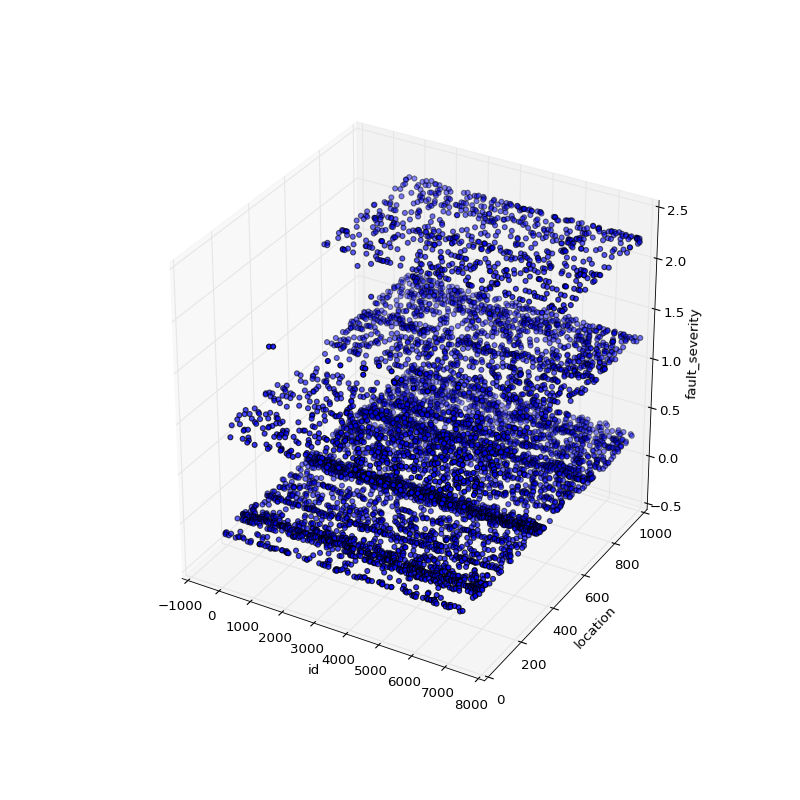

In [211]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['location'], join_df['fault_severity'])
fig3d.set_ylim3d(0,1000)
fig3d.set_xlabel('id')
fig3d.set_ylabel('location')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 3-2. Severity_type versus Fault Severity

Check for a correlation between severity_type and fault_severity. If there is a relationship here, it is more difficult to identify than for location. There are only 2 or 3 dominant severity_types so the amount of data at each of these main data points may mask visibility of any correlations.

<IPython.core.display.Javascript object>


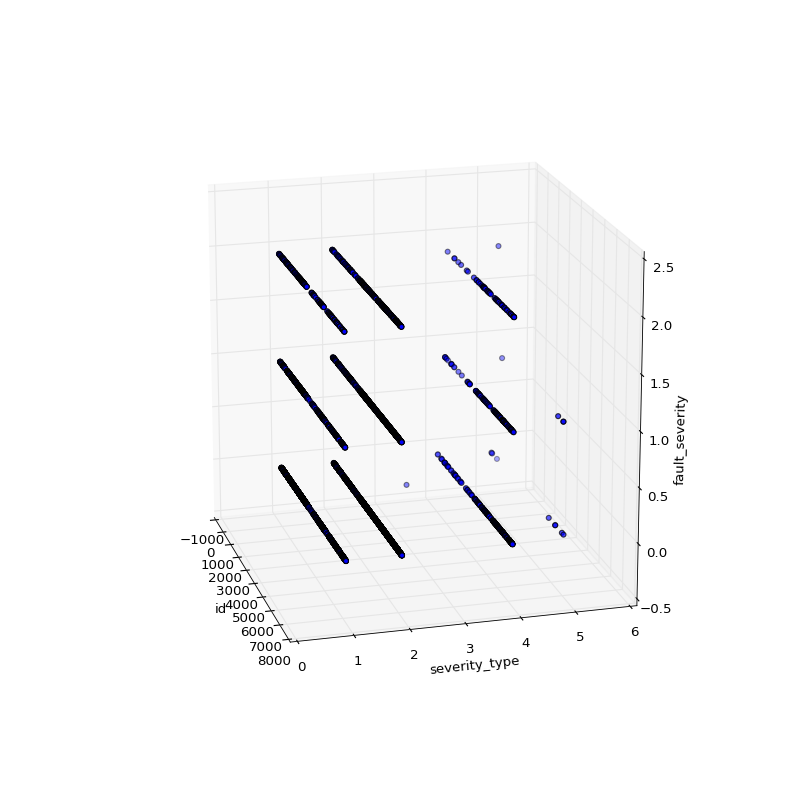

In [228]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['severity_type'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('severity_type')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 3-3. Event_type versus Fault Severity

<IPython.core.display.Javascript object>


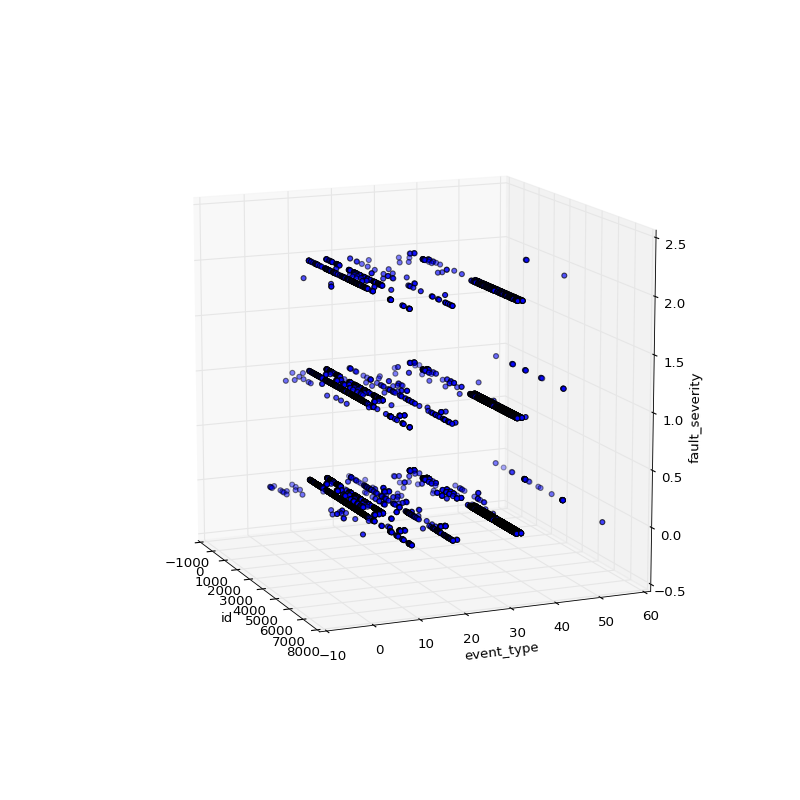

In [230]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['event_type'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('event_type')
fig3d.set_zlabel('fault_severity')
# Set viewpoint.
ax.azim = -60
ax.elev = 300
plot.show()

#### 3-4. Log_feature versus Fault Severity

<IPython.core.display.Javascript object>


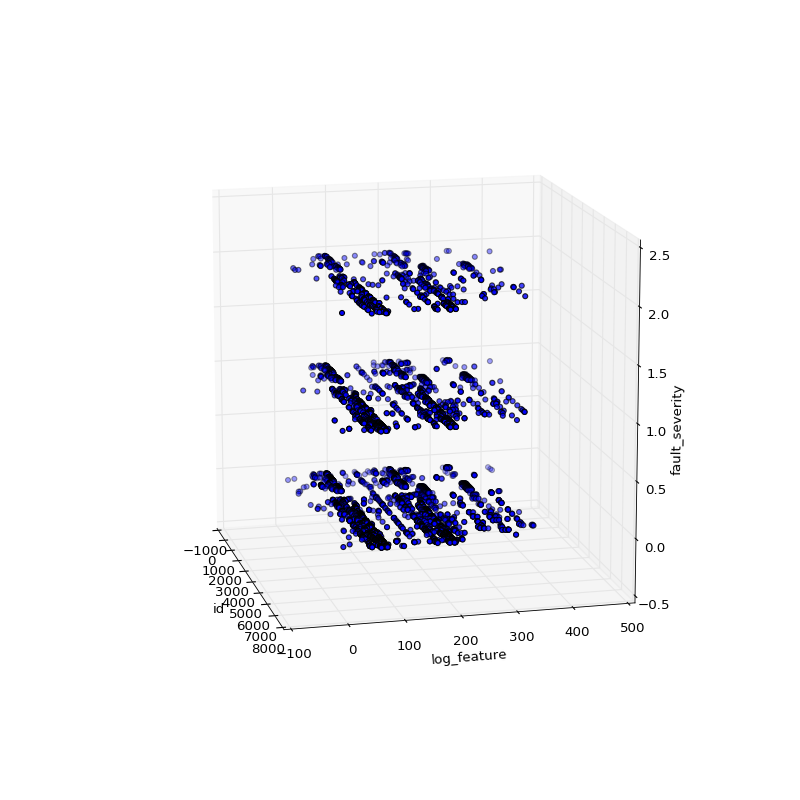

In [231]:

fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['log_feature'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('log_feature')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 3-5. Resource_type versus Fault Severity 

<IPython.core.display.Javascript object>


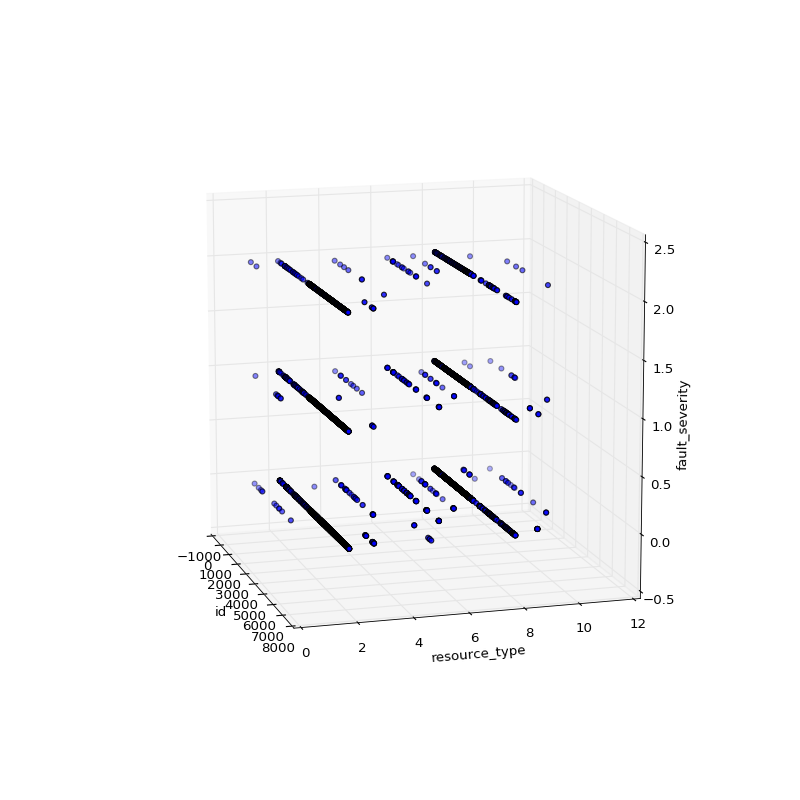

In [232]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df.index, join_df['resource_type'], join_df['fault_severity'])
fig3d.set_xlabel('id')
fig3d.set_ylabel('resource_type')
fig3d.set_zlabel('fault_severity')
plot.show()

#### 3-6. Log_feature versus Volume versus Fault Severity 

Is it just my imagination or are there more fault_severity = 2 events when there is a lower volume of log events? Especially for the higher log_feature numbers.

<IPython.core.display.Javascript object>


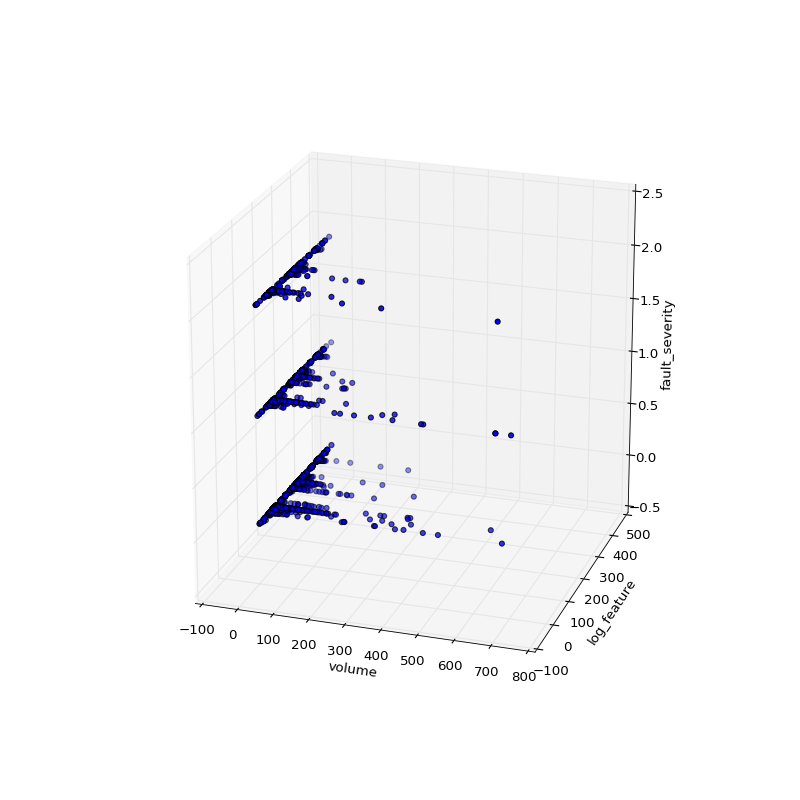

In [233]:
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df['volume'], join_df['log_feature'], join_df['fault_severity'])
fig3d.set_xlabel('volume')
fig3d.set_ylabel('log_feature')
fig3d.set_zlabel('fault_severity')
plot.show()

<IPython.core.display.Javascript object>


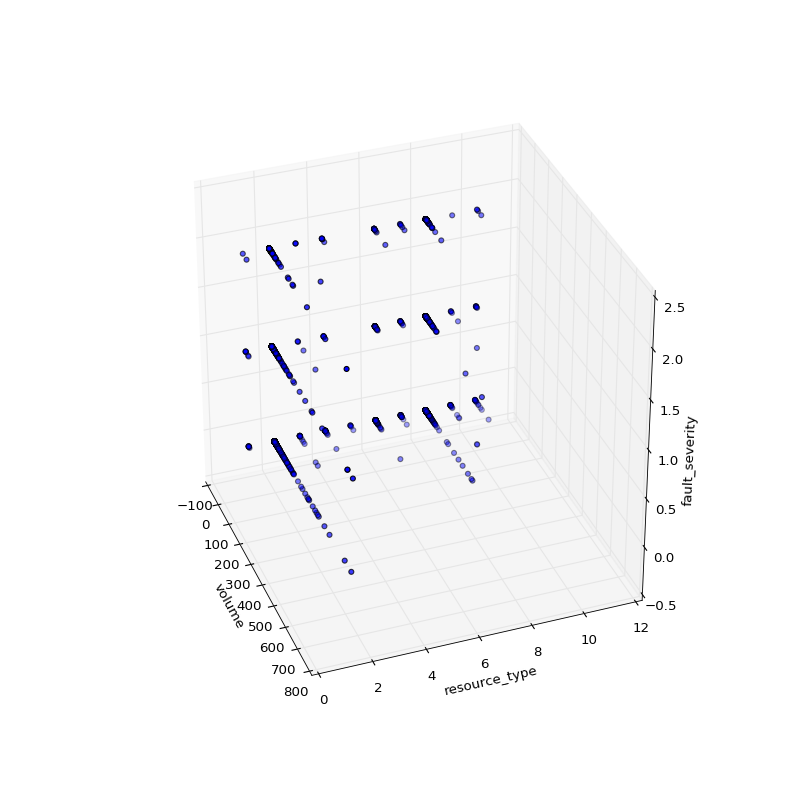

In [235]:
#resource_type versus volume versus fault_severity
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df['volume'], join_df['resource_type'], join_df['fault_severity'])
fig3d.set_xlabel('volume')
fig3d.set_ylabel('resource_type')
fig3d.set_zlabel('fault_severity')
plot.show()

<IPython.core.display.Javascript object>


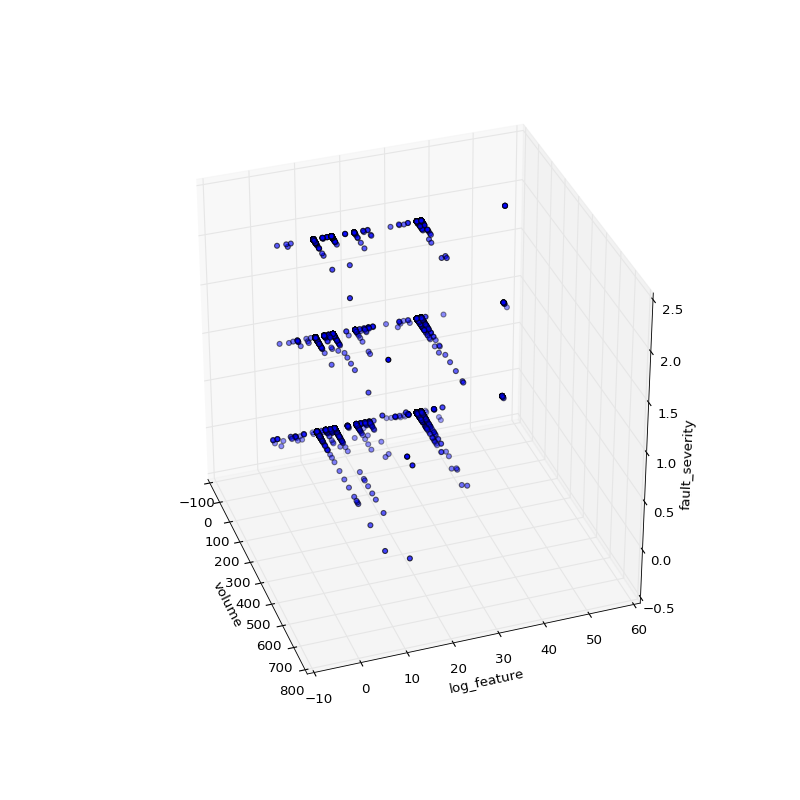

In [234]:
#event_type versus volume versus fault_severity
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df['volume'], join_df['event_type'], join_df['fault_severity'])
fig3d.set_xlabel('volume')
fig3d.set_ylabel('event_type')
fig3d.set_zlabel('fault_severity')
plot.show()

<IPython.core.display.Javascript object>


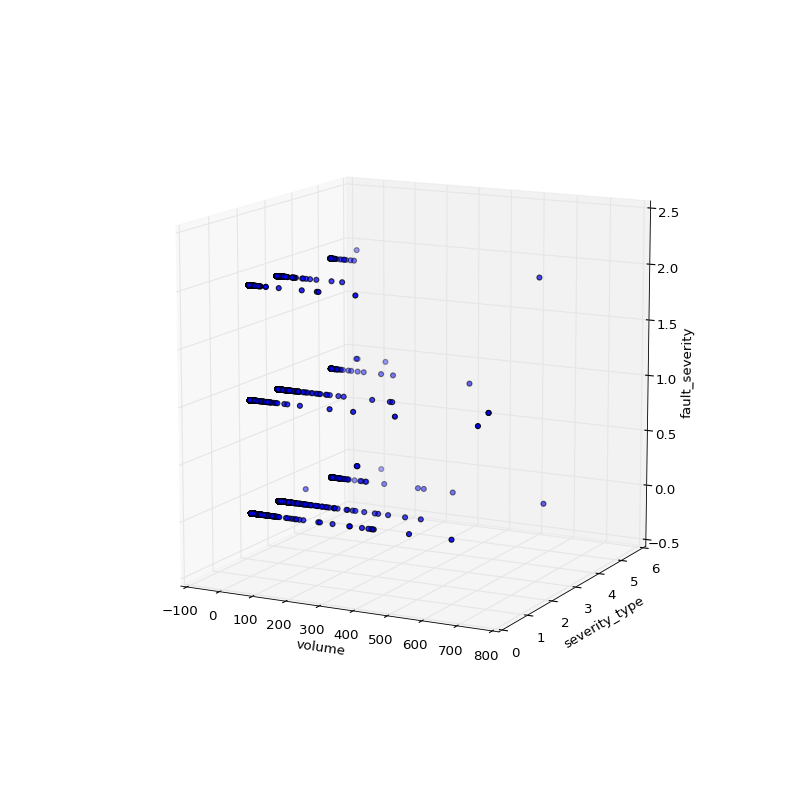

In [236]:
#severity_type versus volume versus fault_severity
fig3d = plot.figure(figsize=(10,10)).gca(projection='3d')
fig3d.scatter(join_df['volume'], join_df['severity_type'], join_df['fault_severity'])
fig3d.set_xlabel('volume')
fig3d.set_ylabel('severity_type')
fig3d.set_zlabel('fault_severity')
plot.show()

### 4. Prepare Data for classifier training

#### 4-1. Handle categorical features as necessary

For the features in this table, take the following steps:

| Feature Name | Feature Type | Table | Distinct Values | Description |
| ------ | ----------- | ------ | ------ | ------ |
| fault_severity  | Categorical | train_df | 3 | Target Variable/Label |
| location  | Categorical | train_df | 929 | Location of fault |
| id  | Categorical | All | N/A | Representing a unique event in the Telstra network |
| log_feature  | Categorical | log_feature_df | 174 | Log message denoting a feature |
| volume  | Continuous | log_feature_df | N/A | Volume of log messages for event |
| event_type | Categorical | event_type_df | 32 | Classification of event into type |
| resource_type   | Categorical | resource_type_df | 10 | Type of network equipment involved in event |
| severity  | Categorical | severity_type_df | 5 | Severity of log message |


1. Convert "log_features", "event_type", "resource_type", "severity_type" to one-hot-encoded features. Preference is to use one-hot-encoding if possible to avoid any implied similarity between labels within the data. However, since there are approaching 1000 locations, the initial decision is not to one-hot-encode "location".
2. Retain "location" and ID as label-encoded categorical features. 
3. Retain volume as a numeric, continuous feature. 
4. Retain "feature_severity" as a label-encoded categorical target variable and label in the training data.

In [216]:
log_dummies=pd.get_dummies(log_feature_df['log_feature'],prefix='log').astype(np.int8)
ev_dummies=pd.get_dummies(event_type_df['event_type'],prefix='ev').astype(np.int8)
res_dummies=pd.get_dummies(resource_type_df['resource_type'],prefix='res').astype(np.int8)
sev_dummies=pd.get_dummies(severity_type_df['severity_type'],prefix='sev').astype(np.int8)


#### 4-2. Assemble individual feature tables

Concatenate applicable one-hot-encoded, label encoded and numeric columns into applicable dataframes.

In [217]:
log_cols=(log_feature_df['id'],log_feature_df['volume'],log_dummies)
log_df=pd.concat(log_cols,axis=1)

ev_cols=(event_type_df['id'],ev_dummies)
ev_df=pd.concat(ev_cols,axis=1)

res_cols=(resource_type_df['id'],res_dummies)
res_df=pd.concat(res_cols,axis=1)

sev_cols=(severity_type_df['id'],sev_dummies)
sev_df=pd.concat(sev_cols,axis=1)

#### 4-3. Group the data to eliminate duplicate IDs

For the purposes of training the classifier, it will be better to eliminate duplicate rows from the data. Group by id for each dataset using the Pandas groupby() function and check number of groups

| Original Table | Size |Grouped Table | Size | Duplicate Rows |
| ------ | ----------- |------ | ----------- | -----------  |
| log_df  | (58671,3) |log_gp_sum  | (7381,2) | Yes |
| ev_df | (31170,2) |ev_gp_sum  | (18552,2) | Yes |
| res_df   | (21076,2) |res_gp_sum | (18552,2) | Yes |
| sev_df  | (18552,2) |sev_gp_sum | (18552,2) | No |
| test_df| (11171,2) |test_gp_sum | (11171,2) | No |
| train_df| (7381,2) |train_gp_sum | (7381,2) | No |

Note:
+ The number of rows for sev_df, test_df and train_df (containing severity_type, location features) is the same before and after grouping. Hence they contain no duplicate IDs.
+ The number of rows for log_df, ev_df, res_df (containing log_feature, event_type, resource_type) is less after grouping. Hence, these tables have duplicate ids.

#### 4-4. Sum the one-hot-encoded data to "squash together" into a single row per group 

For groups of onehotencoded columns, it is possible to accumulate all rows of each group into a single row. Use the Pandas groupby.sum() function to achieve this "squashing together" of groups.

#### 4-5. Sort the data to allow for joining

To ensure all tables that will be joined are sorted in the same way, use "Sort=True" by id column.

In [218]:
log_gp_sum=log_df.groupby('id',sort=True).sum()
ev_gp_sum=ev_df.groupby('id',sort=True).sum()
res_gp_sum=res_df.groupby('id',sort=True).sum()
sev_gp_sum=sev_df.groupby('id',sort=True).sum()
test_gp_sum=test_df.groupby('id',sort=True).sum()
train_gp_sum=train_df.groupby('id',sort=True).sum()

#### 4-6. Join training set tables together

In [219]:
train_X_df=pd.merge(left=train_gp_sum,right=res_gp_sum, how='left', left_index=True, right_index=True)
train_X_df=pd.merge(left=train_X_df,right=sev_gp_sum, how='left', left_index=True, right_index=True)
train_X_df=pd.merge(left=train_X_df,right=ev_gp_sum, how='left', left_index=True, right_index=True)
train_X_df=pd.merge(left=train_X_df,right=log_gp_sum, how='left', left_index=True, right_index=True)

#Define y as 'fault_severity'. Then remove 'fault_severity' column from training set as will be required for input into XGBoost
train_y_df = train_X_df['fault_severity']
del train_X_df['fault_severity']

#### 4-7. Join test set tables together

In [220]:
test_X_df=pd.merge(left=test_gp_sum,right=res_gp_sum, how='left', left_index=True, right_index=True)
test_X_df=pd.merge(left=test_X_df,right=sev_gp_sum, how='left', left_index=True, right_index=True)
test_X_df=pd.merge(left=test_X_df,right=ev_gp_sum, how='left', left_index=True, right_index=True)
test_X_df=pd.merge(left=test_X_df,right=log_gp_sum, how='left', left_index=True, right_index=True)

#### 4-8. Check final train and test set for NaNs and correct length

In [221]:
train_X_df.isnull().values.any()

False

In [222]:
test_X_df.isnull().values.any()

False

In [223]:
train_X_df

location  res_1  res_2  res_3  res_4  res_5  res_6  res_7  res_8  \
id                                                                        
1           601      0      0      0      0      0      1      0      1   
5           460      0      1      0      0      0      0      0      0   
6           332      0      1      0      0      0      0      0      0   
8           243      0      1      0      0      0      0      0      0   
13          418      0      1      0      0      0      0      0      0   
19          644      0      1      0      0      0      0      0      0   
20           79      0      1      1      0      0      0      0      1   
23          257      0      1      0      0      0      0      0      0   
24          367      0      1      0      0      0      0      0      0   
26          238      0      1      0      0      0      0      0      0   
27          793      0      0      0      0      0      0      0      1   
28          889      0      0      0      0      0      0      0      1   
29          505      0      1      0      0      0      0      0      0   
31          457      0      1      0      0      0      0      0      0   
33          473      0      1      0      0      0      0      0      0   
38          468      0      1      0      0      0      0      0      0   
43          300      0      1      0      0      0      0      0      0   
44          451      0      1      0      0      0      0      0      0   
49          484      0      1      0      0      0      0      0      0   
53          242      0      1      0      0      0      0      0      0   
54          488      0      1      0      0      0      0      0      0   
55          471      0      1      0      0      0      0      0      0   
57         1075      0      0      0      0      0      0      0      1   
59          602      0      0      0      0      0      0      0      1   
60          931      0      0      0      0      0      0      0      1   
61          284      0      1      0      0      0      0      0      0   
64          921      0      0      0      0      0      0      0      1   
67          821      0      0      0      0      0      0      0      1   
68          684      0      0      0      0      0      0      0      1   
69          875      0      0      0      0      0      0      0      1   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
18473      1106      0      0      0      0      0      0      0      1   
18474       821      0      0      0      0      0      0      0      1   
18480       485      0      1      0      0      0      0      0      0   
18482      1050      0      0      0      0      0      0      1      1   
18484       535      0      0      1      0      0      0      0      0   
18490      1008      0      0      0      0      0      0      0      1   
18492       135      0      1      0      0      0      0      0      0   
18493       700      0      0      0      0      0      0      0      1   
18498       892      0      1      0      0      0      0      0      0   
18503       123      0      1      0      0      0      0      0      0   
18506       845      0      0      0      0      0      0      0      1   
18507       429      0      1      0      0      0      0      0      0   
18508       709      0      1      0      0      0      0      0      1   
18511       648      0      0      0      0      0      1      0      1   
18520       875      0      0      0      0      0      0      0      1   
18524       834      0      0      0      0      0      0      0      1   
18525       810      0      0      0      0      0      0      0      1   
18527       135      0      1      0      0      0      0      0      0   
18528      1042      0      0      0      0      0      0      0      1   
18530       756      0      0      0      0      0      0      0      1   
18533       734      0      0   

In [226]:
test_X_df

location  res_1  res_2  res_3  res_4  res_5  res_6  res_7  res_8  \
id                                                                        
2           474      0      1      0      0      0      0      0      0   
3            64      0      0      0      0      0      0      0      1   
4           645      0      1      0      0      0      0      0      0   
7           638      0      1      0      0      0      0      0      0   
9          1100      0      0      0      0      0      0      0      1   
10          878      0      0      0      0      0      0      0      1   
11          398      0      1      0      0      0      0      0      0   
12          899      0      1      0      0      0      0      0      0   
14         1009      0      0      0      0      0      0      0      0   
15          159      0      1      0      0      0      0      0      0   
16          831      0      0      0      0      0      0      0      1   
17          799      0      0      0      0      0      0      0      1   
18          126      0      1      0      0      0      0      0      0   
21          826      0      0      0      1      0      1      0      1   
22          122      0      1      0      0      0      0      0      0   
25         1112      0      0      0      0      0      0      0      1   
30          521      0      1      0      0      0      0      0      0   
32          173      0      1      0      0      0      0      0      0   
34         1025      0      1      1      0      0      0      0      1   
35          983      0      0      0      0      0      0      0      1   
36          157      0      1      0      0      0      0      0      0   
37         1005      0      1      0      0      0      0      0      0   
39         1044      0      0      0      0      0      0      0      1   
40           73      0      0      1      0      0      0      0      1   
41          292      0      1      0      0      0      0      0      0   
42         1046      0      0      0      0      0      1      0      1   
45         1019      0      0      0      0      0      0      0      1   
46          479      0      1      0      0      0      0      0      0   
47         1018      0      0      0      0      0      0      0      1   
48          599      0      0      0      0      0      0      0      1   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
18502       600      0      0      0      0      0      0      0      1   
18504       353      0      1      0      0      0      0      0      0   
18505       124      0      1      0      0      0      0      0      0   
18509       846      0      0      0      0      0      0      0      1   
18510       845      0      0      0      0      0      0      0      1   
18512       264      0      1      0      0      0      0      0      0   
18513       923      0      0      0      0      0      0      0      1   
18514       253      0      1      0      0      0      0      0      0   
18515       432      0      1      0      0      0      0      0      1   
18516       350      0      1      0      0      0      0      0      0   
18517       806      0      0      0      0      0      0      1      0   
18518       925      0      1      0      0      0      0      0      0   
18519       760      0      1      0      0      0      0      0      1   
18521        13      0      0      0      0      0      1      0      1   
18522       620      0      0      0      0      0      0      0      1   
18523       375      0      1      0      0      0      0      0      0   
18526       384      0      1      0      0      0      0      0      0   
18529       472      0      1      0      0      0      0      0      0   
18531       485      0      1      0      0      0      0      0      0   
18532       460      0      1      0      0      0      0      0      0   
18534      1072      0      0   

#### 4-9 Clean data

Our data now has no duplicate, NaNs or missing values. If needed, we would impute missing/NaN values with median for categorical values and mean for numeric. 

## Stage 2

### On to Classifier Training...